In [15]:
%load_ext autoreload
%autoreload 2
import BayesRho as BKR
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def plot_digits(instances, images_per_row=5, size=28, **options):
    #size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gist_yarg', **options)
    plt.axis("off")

    
df = pd.read_csv("mnist.csv",header=None)
X = df.iloc[:,0:-1].values # column of the inputs
y = df.iloc[:,-1].values # column of the output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


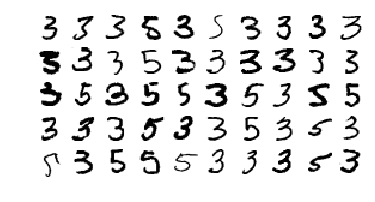

In [16]:
#plot some random digits (it only includes 3 and 5)
plot_digits(X[0:50,:], images_per_row=10, size=28)

In [17]:
n=250
X1=X[0:n,:]# these are n images
Y1=y[0:n].reshape(-1,1) # this is the class variable either 0 (number 3) or 1 (number 5)
#np.random.shuffle(Y1)

Mean ρ =  0.22919356431397245
Posterior probability of [H0,H1] =  [0.0, 1.0]
Decision =  Dependent


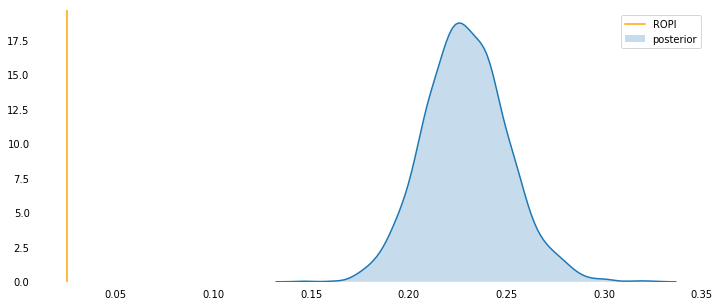

In [18]:
BI = BKR.BKR(BKR.rbf,BKR.CatKern) #we use rbf kernel for X and 'CatKern' for Y (categorical)
meanrho, prob, decision = BI.test(X1,Y1, probTh=0.9, ROPI=0.025, nystrom=False,nsamples=2000)

print('Mean ρ = ',meanrho)
print('Posterior probability of [H0,H1] = ',prob)
print('Decision = ',decision)
fig=BI.plot()


## Test low rank approximation

Mean ρ =  0.27447015485937254
Posterior probability of [H0,H1] =  [0.0, 1.0]
Decision =  Dependent


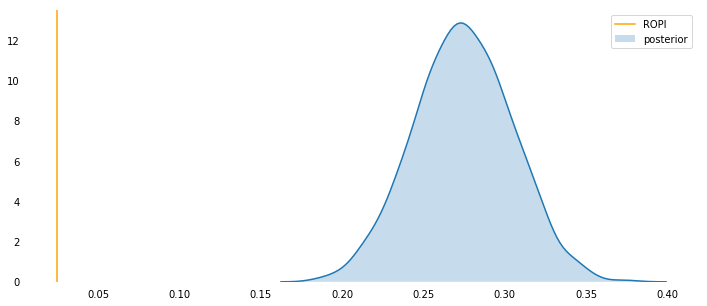

In [19]:
BI = BKR.BKR(BKR.rbf,BKR.CatKern) #we use rbf kernel for X and 'CatKern' for Y (categorical)
meanrho, prob, decision = BI.test(X1,Y1, probTh=0.9, ROPI=0.025, nystrom=True, nsamples=2000,  ncomponents = 30)

print('Mean ρ = ',meanrho)
print('Posterior probability of [H0,H1] = ',prob)
print('Decision = ',decision)
fig=BI.plot()

## Independence

In [23]:
n=250
X1=X[0:n,:]# these are n images
Y1=y[0:n].reshape(-1,1) # this is the class variable either 0 (number 3) or 1 (number 5)
np.random.shuffle(Y1) # now they should be independent

Mean ρ =  -0.002955295795199937
Posterior probability of [H0,H1] =  [0.9975, 0.0025]
Decision =  Independent


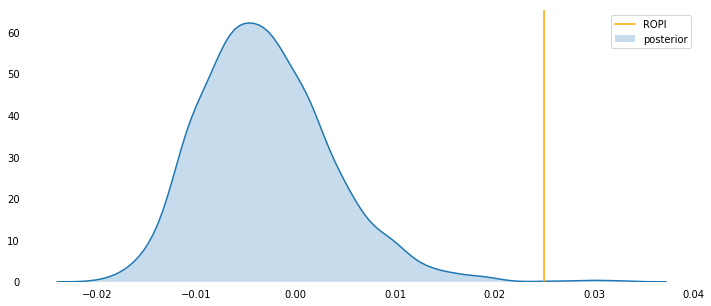

In [24]:
BI = BKR.BKR(BKR.rbf,BKR.CatKern) #we use rbf kernel for X and 'CatKern' for Y (categorical)
meanrho, prob, decision = BI.test(X1,Y1, probTh=0.9, ROPI=0.025, nystrom=False,nsamples=2000)

print('Mean ρ = ',meanrho)
print('Posterior probability of [H0,H1] = ',prob)
print('Decision = ',decision)
fig=BI.plot()


## Test low rank approximation

Mean ρ =  -0.0038065404807785803
Posterior probability of [H0,H1] =  [0.9925, 0.0075]
Decision =  Independent


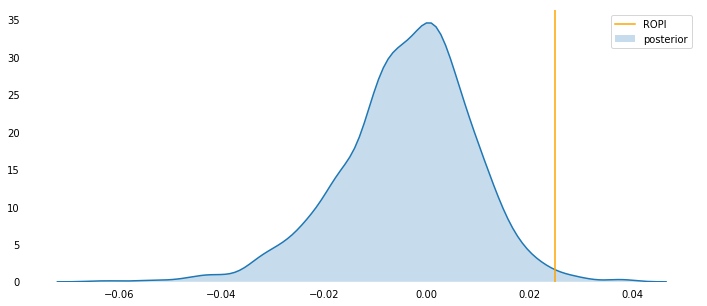

In [25]:
BI = BKR.BKR(BKR.rbf,BKR.CatKern) #we use rbf kernel for X and 'CatKern' for Y (categorical)
meanrho, prob, decision = BI.test(X1,Y1, probTh=0.9, ROPI=0.025, nystrom=True, nsamples=2000,  ncomponents = 30)

print('Mean ρ = ',meanrho)
print('Posterior probability of [H0,H1] = ',prob)
print('Decision = ',decision)
fig=BI.plot()